In [1]:
import os
from argparse import ArgumentParser
from mmdet.apis import show_result_pyplot
from mmfewshot.detection.apis import (
    inference_detector,
    init_detector,
    process_support_images,
)

In [2]:
import numpy as np
from easydict import EasyDict as edict

In [3]:
args = edict(
    {
        "support_images_dir": "/home/jongphago/mmfewshot/demo/demo_detection_images/manholes",
        "image": "/home/jongphago/mmfewshot/demo/demo_detection_images/query_images/query_manhole.jpg",
        "config": "/home/jongphago/mmfewshot/configs/detection/attention_rpn/coco/attention-rpn_r50_c4_4xb2_coco_base-training.py",
        "checkpoint": "/home/jongphago/mmfewshot/work_dirs/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth",
        "score_thr": 0.3,
        "device": "cuda:0",
    }
)

In [4]:
def main(args):
    # build the model from a config file and a checkpoint file
    model = init_detector(args.config, args.checkpoint, device=args.device)
    # prepare support images, each demo image only contain one instance
    files = os.listdir(args.support_images_dir)
    support_images = [os.path.join(args.support_images_dir, file) for file in files]
    classes = [file.split(".")[0] for file in files]
    support_labels = [[file.split(".")[0]] for file in files]
    process_support_images(model, support_images, support_labels, classes=classes)
    # test a single image
    result = inference_detector(model, args.image)
    # show the results
    show_result_pyplot(model, args.image, result, score_thr=args.score_thr)

load checkpoint from local path: /home/jongphago/mmfewshot/work_dirs/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth


/opt/conda/envs/openmmlab/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


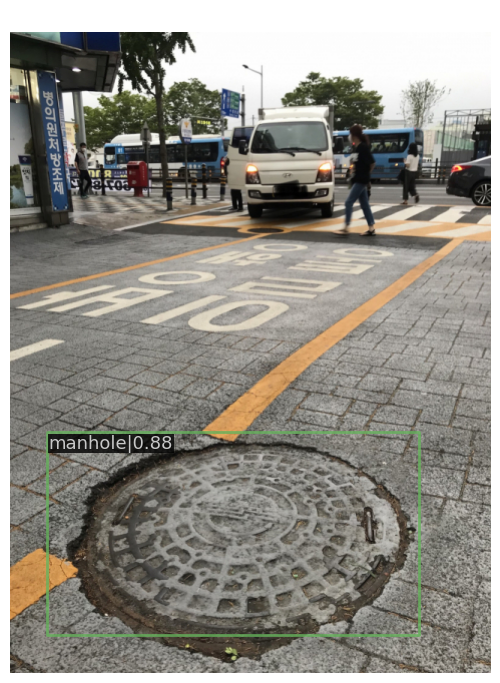

In [5]:
main(args)